# Data Cleaning

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar
import matplotlib.dates as mdates
from prophet import Prophet


# Load the CSV file
df = pd.read_csv('/Users/mahmudurrahman/Desktop/Personal/Football Data transfer market/appearances.csv', low_memory=False)

print(df.head())


    appearance_id  game_id  player_id  player_club_id  player_current_club_id  \
0   2231978_38004  2231978      38004             853                     235   
1   2233748_79232  2233748      79232            8841                    2698   
2   2234413_42792  2234413      42792            6251                     465   
3   2234418_73333  2234418      73333            1274                    6646   
4  2234421_122011  2234421     122011             195                    3008   

         date       player_name competition_id  yellow_cards  red_cards  \
0  2012-07-03  Aurélien Joachim            CLQ             0          0   
1  2012-07-05    Ruslan Abyshov            ELQ             0          0   
2  2012-07-05       Sander Puri            ELQ             0          0   
3  2012-07-05   Vegar Hedenstad            ELQ             0          0   
4  2012-07-05  Markus Henriksen            ELQ             0          0   

   goals  assists  minutes_played  
0      2        0         

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706806 entries, 0 to 1706805
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   appearance_id           object
 1   game_id                 int64 
 2   player_id               int64 
 3   player_club_id          int64 
 4   player_current_club_id  int64 
 5   date                    object
 6   player_name             object
 7   competition_id          object
 8   yellow_cards            int64 
 9   red_cards               int64 
 10  goals                   int64 
 11  assists                 int64 
 12  minutes_played          int64 
dtypes: int64(9), object(4)
memory usage: 169.3+ MB
None


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
print(df.isnull().sum())

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               6
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64


In [6]:
df['player_name'] = df['player_name'].fillna('Unknown')

In [7]:
print(df['competition_id'].unique())

['CLQ' 'ELQ' 'UKRS' 'RUP' 'UKR1' 'DK1' 'RUSS' 'RU1' 'BESC' 'UKRP' 'BE1'
 'FRCH' 'POCP' 'SC1' 'NLSC' 'CIT' 'FR1' 'NL1' 'SCI' 'POSU' 'DFL' 'GBCS'
 'DFB' 'TR1' 'PO1' 'GB1' 'ES1' 'SUC' 'L1' 'GR1' 'IT1' 'CDR' 'DKP' 'USC'
 'CL' 'EL' 'NLP' 'SFA' 'GRP' 'FAC' 'KLUB' 'ECLQ' 'CGB']


In [8]:
# Remove rows with unwanted competition_id
df = df[~df['competition_id'].isin(['CLQ', 'ELQ', 'UKRS', 'RUP', 'UKR1', 'DK1', 'RUSS', 'RU1', 'BESC', 'UKRP', 'BE1', 'FRCH', 'POCP', 'SC1', 'NLSC', 'CIT', 'NL1', 'SCI', 'POSU', 'DFL', 'GBCS', 'TR1', 'PO1', 'SUC', 'L1', 'GR1', 'CDR', 'DKP', 'USC', 'NLP', 'SFA', 'GRP', 'FAC', 'KLUB', 'ECLQ', 'CGB'])]

In [9]:
# competition_id to name
competition_mapping = {
    
    "FR1": "French Ligue 1",
    "GB1": "English Premier League",
    "IT1": "Italian Serie A",
    "ES1": "Spanish La Liga",
    "CL": "UEFA Champions League",
    "EL": "UEFA Europa League",
    "DFB": "DFB-Pokal (German Cup)"
}

# Adding competition name column
df['competition_name'] = df['competition_id'].map(competition_mapping)

In [10]:
# filtering data from 2020 to 2025
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    
df = df[(df['year'] >= 2020) & (df['year'] <= 2025)]

print(df.head())

         appearance_id  game_id  player_id  player_club_id  \
981510  3219259_112302  3219259     112302            1010   
981511  3219259_121477  3219259     121477            1010   
981512  3219259_127187  3219259     127187            1010   
981513  3219259_128900  3219259     128900            1010   
981514  3219259_128901  3219259     128901             543   

        player_current_club_id       date         player_name competition_id  \
981510                    2441 2020-01-01     Roberto Pereyra            GB1   
981511                     543 2020-01-01        Craig Dawson            GB1   
981512                      29 2020-01-01  Abdoulaye Doucouré            GB1   
981513                     931 2020-01-01  Nathaniel Chalobah            GB1   
981514                    1003 2020-01-01         Conor Coady            GB1   

        yellow_cards  red_cards  goals  assists  minutes_played  \
981510             0          0      0        0               1   
981511      

# Player Performance

In [12]:
# Top 10 Most Matches Played by a player from 2020 to 2025
most_matches = (
    df.groupby('player_name')['game_id']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'game_id': 'matches_played'})
)

print(most_matches.head(10))

        player_name  matches_played
0            Danilo             280
1   Bruno Fernandes             243
2     Mohamed Salah             242
3  Lautaro Martínez             241
4         Jan Oblak             237
5   Bryan Cristante             234
6    Nicolò Barella             232
7           Ederson             231
8           Vitinha             230
9      Ángel Correa             230


In [13]:
# Most Game time by a player from 2020 to 2025
most_minutes = (
    df.groupby('player_name')['minutes_played']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print(most_minutes.head(10))

           player_name  minutes_played
0               Danilo           22334
1            Jan Oblak           21394
2      Bruno Fernandes           20785
3              Ederson           20651
4          Álex Remiro           20376
5  Giovanni Di Lorenzo           20004
6        Mohamed Salah           19780
7     Gianluca Mancini           19417
8          Declan Rice           19087
9       Theo Hernández           19083


In [14]:
# TOP 10 players with the most goals from 2020 to 2025
top_scorers = (
    df.groupby('player_name')['goals']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print(top_scorers)


          player_name  goals
0       Kylian Mbappé    176
1       Mohamed Salah    149
2      Erling Haaland    133
3    Lautaro Martínez    116
4  Robert Lewandowski    115
5       Romelu Lukaku    100
6          Harry Kane    100
7       Ciro Immobile     99
8      Jonathan David     96
9      Dušan Vlahović     92


In [15]:
# TOP 10 players with the most assists from 2020 to 2025
top_assists = (
    df.groupby('player_name')['assists']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print(top_assists)

              player_name  assists
0         Kevin De Bruyne       79
1           Mohamed Salah       77
2         Bruno Fernandes       73
3            Lionel Messi       65
4           Kylian Mbappé       60
5         Vinicius Junior       58
6             Bukayo Saka       58
7             Rafael Leão       56
8                Raphinha       55
9  Trent Alexander-Arnold       52


In [16]:
# Top 10 Most Efficient Goal Scorers
efficiency = df.groupby('player_name').agg({
    'goals': 'sum',
    'minutes_played': 'sum'
}).reset_index()

efficiency = efficiency[(efficiency['minutes_played'] >= 180) & (efficiency['goals'] > 0)]
efficiency['minutes_per_goal'] = efficiency['minutes_played'] / efficiency['goals']
top_efficient_scorers = efficiency.sort_values(by='minutes_per_goal', ascending=True).head(10)

print(top_efficient_scorers)



                   player_name  goals  minutes_played  minutes_per_goal
1586          Dominick Drexler      4             194         48.500000
780               Benito Raman      4             240         60.000000
4002             Marco Richter      3             181         60.333333
5557            Samuel Essende      3             195         65.000000
1783  Eric-Maxim Choupo-Moting     20            1526         76.300000
217          Aleksandr Sobolev      4             310         77.500000
4847         Olarenwaju Kayode      4             311         77.750000
4567              Munas Dabbur     12             939         78.250000
4460            Milos Pantovic      4             317         79.250000
2223         Giampaolo Pazzini      3             253         84.333333


In [17]:
# Most Yellow cards received by a Player
top_yellow_cards = (
    df.groupby('player_name')['yellow_cards']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print("Top 10 Players with Most Yellow Cards:")
print(top_yellow_cards.head(10))


Top 10 Players with Most Yellow Cards:
        player_name  yellow_cards
0  Gianluca Mancini            67
1    Benjamin André            63
2          Casemiro            59
3   Bryan Cristante            58
4             Djené            57
5     Igor Zubeldia            56
6    Facundo Medina            55
7            Danilo            54
8   Leandro Paredes            54
9    Theo Hernández            53


In [18]:
# Most Red cards received by a Player
top_red_cards = (
    df.groupby('player_name')['red_cards']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print("\nTop 10 Players with Most Red Cards:")
print(top_red_cards.head(10))



Top 10 Players with Most Red Cards:
       player_name  red_cards
0    Téji Savanier          7
1      Chimy Ávila          4
2      Luiz Felipe          4
3            Dante          4
4  Germán Pezzella          4
5       Lewis Dunk          4
6      Nabil Fekir          4
7  Domingos Duarte          3
8            Djené          3
9       Allan Nyom          3


In [19]:
# Most Red cards received by a Player
disciplinary = df.groupby('player_name').agg({
    'yellow_cards': 'sum',
    'red_cards': 'sum'
}).reset_index()

disciplinary['total_cards'] = disciplinary['yellow_cards'] + disciplinary['red_cards']

top_disciplinary = disciplinary.sort_values(by='total_cards', ascending=False).head(10)

print(top_disciplinary[['player_name', 'total_cards']])



           player_name  total_cards
2232  Gianluca Mancini           68
783     Benjamin André           63
1011          Casemiro           61
937    Bryan Cristante           60
1556             Djené           60
2513     Igor Zubeldia           58
5948    Theo Hernández           56
3557   Leandro Paredes           56
1871    Facundo Medina           55
5834      Stefan Savic           54


In [20]:
# Players who played every minute
player_minutes = df.groupby('player_name').agg({
    'game_id': 'count',           # number of appearances
    'minutes_played': 'sum'       # total minutes played
}).rename(columns={'game_id': 'matches_played'}).reset_index()

player_minutes = player_minutes[player_minutes['matches_played'] >= 40]

player_minutes['expected_minutes'] = player_minutes['matches_played'] * 90

ever_present = player_minutes[
    player_minutes['minutes_played'] == player_minutes['expected_minutes']
]
top_ever_present = ever_present.sort_values(by='matches_played', ascending=False).head(10)

print(top_ever_present[['player_name', 'matches_played', 'minutes_played']])

                 player_name  matches_played  minutes_played
3657         Lorenzo Montipò             175           15750
4265               Matz Sels             155           13950
3319       Kasper Schmeichel             151           13590
4005         Marco Silvestri             148           13320
6196  Vanja Milinković-Savić             136           12240
481              André Onana             130           11700
789         Benjamin Lecomte             122           10980
5023         Paul Bernardoni             107            9630
5075              Pepe Reina             104            9360
3727         Lucas Chevalier             103            9270


In [21]:
# Players who got mosty substituted
less_than_full_match = df[df['minutes_played'] < 90]

partial_appearances = (
    less_than_full_match.groupby('player_name')
    .agg(number_of_matches=('game_id', 'count'),
         total_minutes_played =('minutes_played', 'sum' ))
    .reset_index()
    .sort_values(by='number_of_matches', ascending=False)
)

print(partial_appearances.head(10))

           player_name  number_of_matches  total_minutes_played
6122      Ángel Correa                203                  8736
3928   Matteo Politano                198                 10583
4875       Raúl García                183                  6343
809        Brahim Díaz                179                  8760
4692             Pedro                175                  7655
5014           Rodrygo                172                  9006
4776   Piotr Zieliński                171                  9698
4784             Portu                168                  6298
6112     Álvaro Morata                167                  8971
5164  Samuel Chukwueze                165                  6892


# Club Performance Insights

In [23]:
# Number of matches played by each club

club_matches = (
    df.groupby('player_club_id')['game_id']
    .nunique() 
    .reset_index()
    .rename(columns={'game_id': 'number_of_matches'})
    .sort_values(by='number_of_matches', ascending=False)
)

print(club_matches.head(10))


     player_club_id  number_of_matches
100             418                267
6                12                262
75              281                262
141             985                259
27               46                256
17               31                255
3                 5                254
47              131                254
130             800                250
7                13                249


In [24]:
# top 10 clubs with most goals
club_goals = (
    df.groupby('player_club_id')['goals']
    .sum()
    .reset_index()
    .sort_values(by='goals', ascending=False)
)


print(club_goals.head(10))


     player_club_id  goals
75              281    602
111             583    549
17               31    529
27               46    507
47              131    507
130             800    488
100             418    485
5                11    453
3                 5    433
204            6195    429


In [25]:
# # top 10 clubs with worst discipline
club_discipline = (
    df.groupby('player_club_id')
    .agg(yellow_cards_sum=('yellow_cards', 'sum'),
         red_cards_sum=('red_cards', 'sum'))
    .reset_index()
)

club_discipline['total_cards'] = club_discipline['yellow_cards_sum'] + club_discipline['red_cards_sum']

club_discipline = club_discipline.sort_values(by='total_cards', ascending=False)

print(club_discipline.head(10))

     player_club_id  yellow_cards_sum  red_cards_sum  total_cards
197            3709               666             20          686
86              368               620             19          639
6                12               624             11          635
91              398               612             15          627
7                13               593             19          612
3                 5               551             15          566
120             681               550             13          563
154            1050               539              9          548
51              150               514             30          544
47              131               511             12          523


In [26]:
# Clubs with Most Incoming Transfers
transfers = df[df['player_club_id'] != df['player_current_club_id']]

# Count how many times each current club got a player
incoming_transfers = (
    transfers.groupby('player_current_club_id')['player_id']
    .nunique()
    .reset_index()
    .rename(columns={'player_id': 'incoming_transfers'})
    .sort_values(by='incoming_transfers', ascending=False)
)

print(incoming_transfers.head(10))


     player_current_club_id  incoming_transfers
130                     749                  32
227                    2919                  31
90                      416                  31
123                     683                  29
116                     631                  29
93                      430                  29
28                       89                  28
1                         5                  27
124                     703                  27
74                      366                  26


In [27]:
#### Clubs with Most Outgoing Transfers
outgoing_transfers = (
    transfers.groupby('player_club_id')['player_id']
    .nunique()
    .reset_index()
    .rename(columns={'player_id': 'outgoing_transfers'})
    .sort_values(by='outgoing_transfers', ascending=False)
)

print("Clubs with Most Outgoing Transfers")

print(outgoing_transfers.head(10))


Clubs with Most Outgoing Transfers
     player_club_id  outgoing_transfers
71              273                  60
67              252                  57
72              276                  56
6                12                  53
101             430                  51
66              244                  51
149            1041                  50
98              417                  48
110             583                  47
112             610                  47


In [28]:
## Clubs That Substitute Players Most

subbed_players = df[df['minutes_played'] < 90]

club_subs = (
    subbed_players.groupby('player_club_id')['player_id']
    .count()
    .reset_index()
    .rename(columns={'player_id': 'substitution_count'})
)

avg_minutes = (
    df.groupby('player_club_id')['minutes_played']
    .mean()
    .reset_index()
    .rename(columns={'minutes_played': 'avg_minutes_played'})
)

club_sub_analysis = club_subs.merge(avg_minutes, on='player_club_id')
club_sub_analysis = club_sub_analysis.sort_values(by='substitution_count', ascending=False)


print(club_sub_analysis.head(10))


     player_club_id  substitution_count  avg_minutes_played
26               46                2351           63.001759
128             800                2241           63.353428
118             681                2209           63.347629
3                 5                2190           64.445073
89              398                2186           63.915330
6                12                2172           65.098871
7                13                2155           64.541841
84              368                2114           64.164402
45              131                2105           64.207461
151            1050                2080           63.811590


# Competition-Based Insights

In [30]:

# Display sample
print(df[['competition_id', 'competition_name']].drop_duplicates().sort_values(by='competition_id'))


        competition_id        competition_name
1000917             CL   UEFA Champions League
994611             DFB  DFB-Pokal (German Cup)
1001165             EL      UEFA Europa League
981783             ES1         Spanish La Liga
983327             FR1          French Ligue 1
981510             GB1  English Premier League
982575             IT1         Italian Serie A


In [31]:
df['competition_name'] = df['competition_id'].map(competition_mapping)
print(df.columns)

Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'competition_name', 'year'],
      dtype='object')


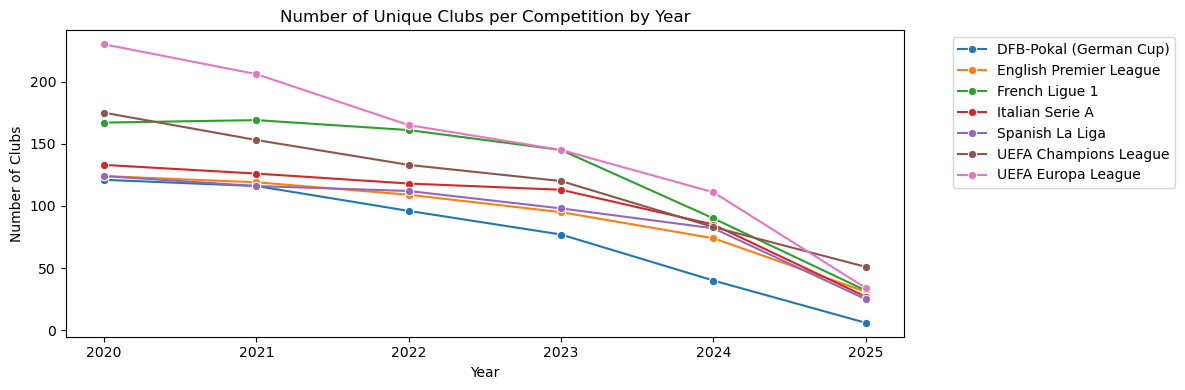

In [32]:
#Number of clubs per competition
# date is a datetime and extracting year from date 
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Group by competition and year, then count unique clubs
clubs_per_competition = (
    df.groupby(['competition_name', 'year'])['player_current_club_id']
    .nunique()
    .reset_index(name='unique_club_count')
)

plt.figure(figsize=(12, 4))
sns.lineplot(data=clubs_per_competition, x='year', y='unique_club_count', hue='competition_name', marker='o')
plt.title('Number of Unique Clubs per Competition by Year')
plt.xlabel('Year')
plt.ylabel('Number of Clubs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



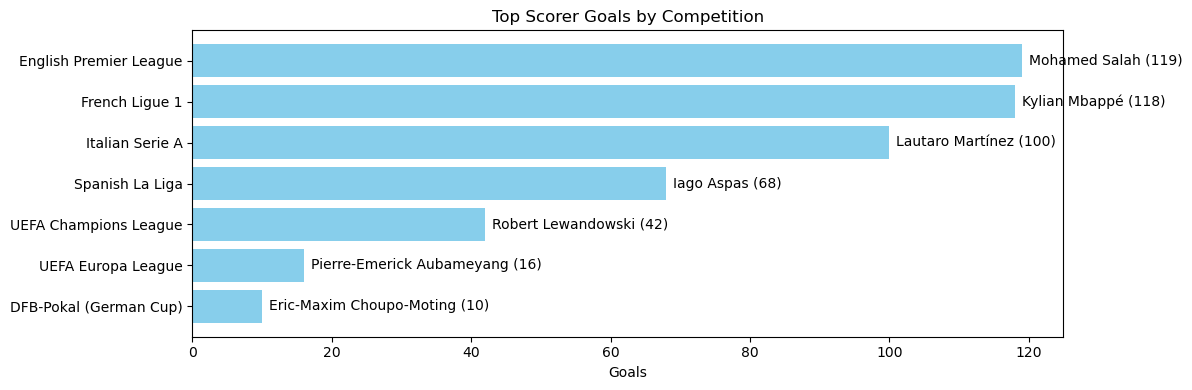

In [33]:
#### most goals scored by a player in each competition

goals_by_competition = (
    df.groupby(['competition_name', 'player_name'])['goals']
    .sum()
    .reset_index()
)

top_scorers = goals_by_competition.sort_values(['competition_name', 'goals'], ascending=[True, False])

top_scorers = top_scorers.drop_duplicates(subset=['competition_name'], keep='first')

top_scorers = top_scorers.sort_values(by='goals', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 4))

# Horizontal bar plot
plt.barh(top_scorers['competition_name'], top_scorers['goals'], color='skyblue')

plt.gca().invert_yaxis()  # highest goals on top
plt.xlabel('Goals')
plt.title('Top Scorer Goals by Competition')

# Add player names and goal numbers on the bars
for index, row in top_scorers.iterrows():
    plt.text(row['goals'] + 1, index, f"{row['player_name']} ({row['goals']})", va='center')

plt.tight_layout()
plt.show()


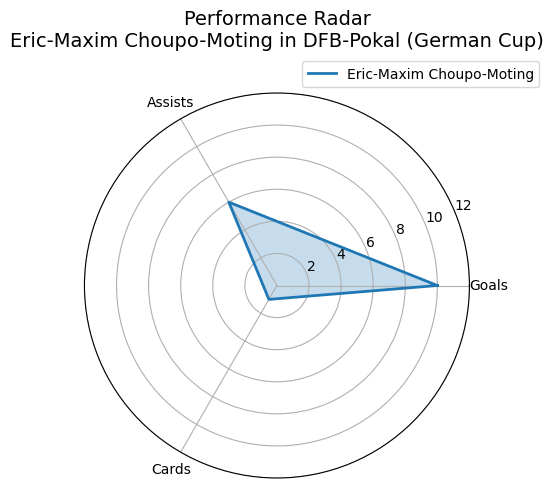

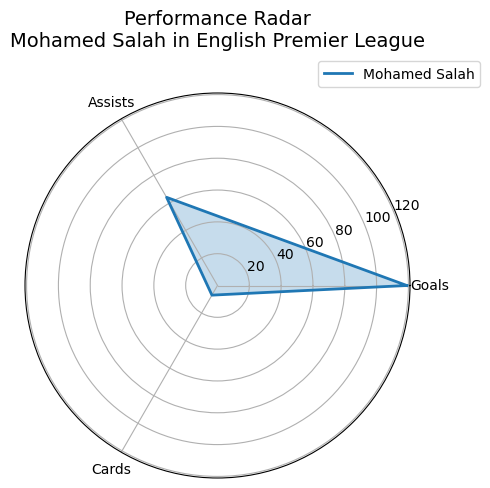

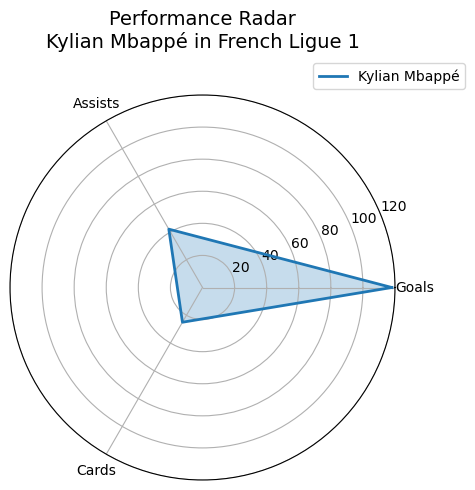

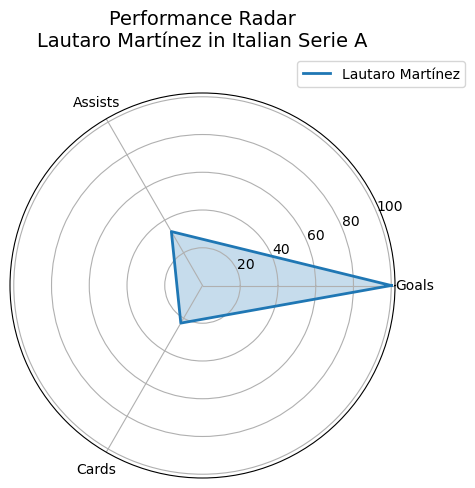

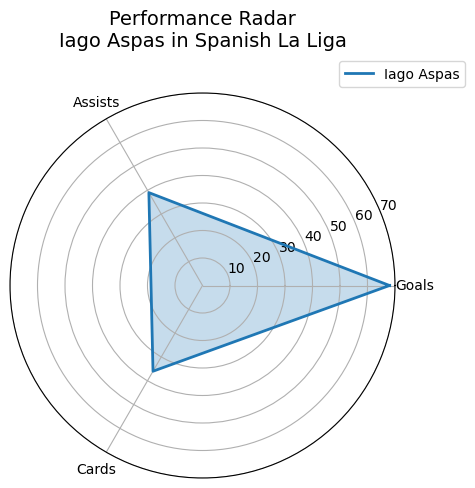

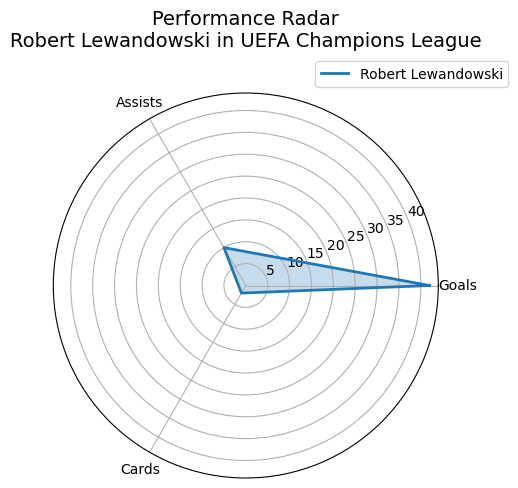

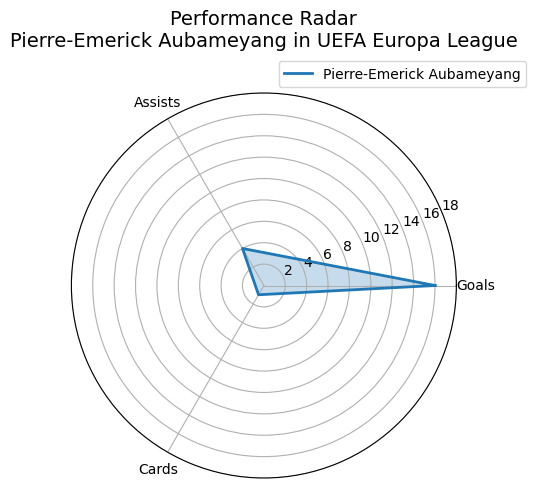

In [34]:
# Performance radar for all the top scorrers
df['cards'] = df['yellow_cards'] + df['red_cards']

top_scorer_list = top_scorers[['competition_name', 'player_name']]

performance = (
    df.groupby(['competition_name', 'player_name'])[['goals', 'assists', 'cards']]
    .sum()
    .reset_index()
)

performance_top = performance.merge(top_scorer_list, on=['competition_name', 'player_name'], how='inner')

# Radar chart setup
categories = ['Goals', 'Assists', 'Cards']
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # to close the circle

def plot_radar(player_data, player_name, competition):
    values = player_data + player_data[:1]  # close the circle
    
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=player_name)
    ax.fill(angles, values, alpha=0.25)

    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Set max for y-axis a bit above max stat value
    max_val = max(player_data) + 2
    ax.set_ylim(0, max_val)

    ax.set_title(f'Performance Radar\n{player_name} in {competition}', size=14, y=1.1)
    ax.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()

# Plot radar charts for all top scorers
for _, row in performance_top.iterrows():
    data = [row['goals'], row['assists'], row['cards']]
    plot_radar(data, row['player_name'], row['competition_name'])

In [35]:
from tabulate import tabulate
scorers = (
    df.groupby(['year', 'competition_name', 'player_name'])['goals']
    .sum()
    .reset_index()
)

scorers['rank'] = scorers.groupby(['year', 'competition_name'])['goals'] \
                         .rank(method='first', ascending=False)

top_scorers = scorers[scorers['rank'] == 1].sort_values(['competition_name', 'year'])

# separate competition DataFrames
competitions = top_scorers['competition_name'].unique()
comp_dfs = {comp: top_scorers[top_scorers['competition_name'] == comp][['year', 'player_name', 'goals']] 
            for comp in competitions}

max_comps_per_row = 3
for i in range(0, len(competitions), max_comps_per_row):
    row_comps = competitions[i:i+max_comps_per_row]
    
    # Prepare tables for this row
    tables = []
    for comp in row_comps:
        table = tabulate(comp_dfs[comp], headers='keys', tablefmt='psql', showindex=False)
        tables.append(table)
    
    # Print tables side by side
    print("\n" + "="*80)
    split_tables = [t.split('\n') for t in tables]
    for line in zip(*split_tables):
        print("   ".join(line))


+--------+--------------------+---------+   +--------+----------------+---------+   +--------+-----------------+---------+
|   year | player_name        |   goals |   |   year | player_name    |   goals |   |   year | player_name     |   goals |
|--------+--------------------+---------|   |--------+----------------+---------|   |--------+-----------------+---------|
|   2020 | Robert Lewandowski |       5 |   |   2020 | Mohamed Salah  |      23 |   |   2020 | Kylian Mbappé   |      19 |
|   2021 | Erling Haaland     |       6 |   |   2021 | Mohamed Salah  |      24 |   |   2021 | Kylian Mbappé   |      24 |
|   2022 | André Silva        |       4 |   |   2022 | Harry Kane     |      26 |   |   2022 | Kylian Mbappé   |      32 |
|   2023 | Randal Kolo Muani  |       6 |   |   2023 | Erling Haaland |      29 |   |   2023 | Kylian Mbappé   |      34 |
|   2024 | Hugo Ekitiké       |       3 |   |   2024 | Erling Haaland |      27 |   |   2024 | Jonathan David  |      25 |
|   2025 | Benj

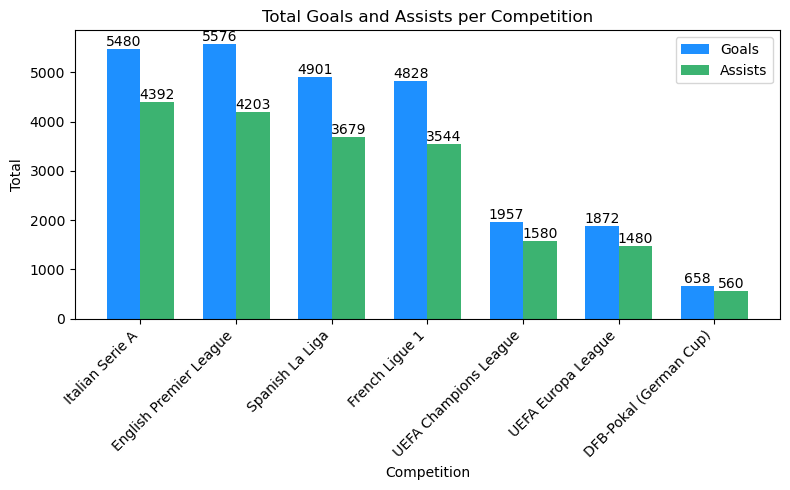

In [36]:
#Total Goals and Assists per Competition
performance = df.groupby('competition_name')[['goals', 'assists']].sum().reset_index()

performance['total'] = performance['goals'] + performance['assists']
performance = performance.sort_values(by='total', ascending=False)

x = np.arange(len(performance['competition_name']))  # the label locations
width = 0.35  # width of the bars

plt.figure(figsize=(8, 5))
bars1 = plt.bar(x - width/2, performance['goals'], width, label='Goals', color='dodgerblue')
bars2 = plt.bar(x + width/2, performance['assists'], width, label='Assists', color='mediumseagreen')

plt.xlabel('Competition')
plt.ylabel('Total')
plt.title('Total Goals and Assists per Competition')
plt.xticks(x, performance['competition_name'], rotation=45, ha='right')
plt.legend()

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{int(bar.get_height())}', ha='center', va='bottom')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{int(bar.get_height())}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


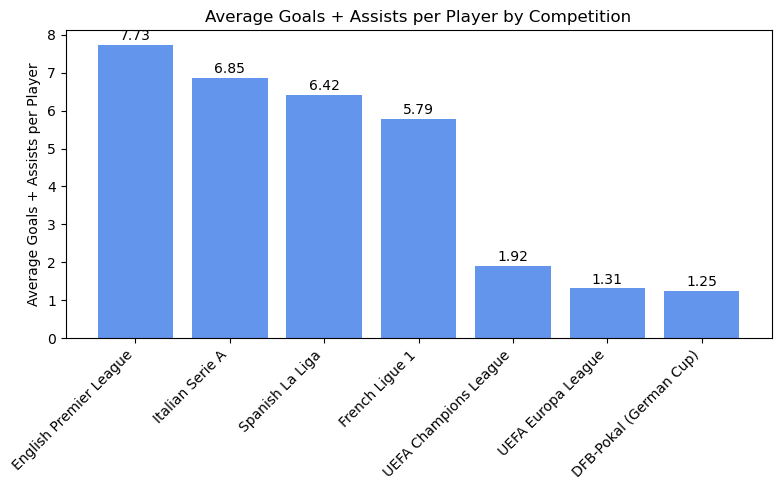

In [37]:
# Average Goals and Assists per Player by Competition
performance_per_player_comp = df.groupby(['competition_name', 'player_name'])[['goals', 'assists']].sum().reset_index()

performance_per_player_comp['goals_assists'] = performance_per_player_comp['goals'] + performance_per_player_comp['assists']

avg_performance_per_comp = performance_per_player_comp.groupby('competition_name')['goals_assists'].mean().reset_index()

avg_performance_per_comp = avg_performance_per_comp.sort_values(by='goals_assists', ascending=False)

plt.figure(figsize=(8, 5))
bars = plt.bar(avg_performance_per_comp['competition_name'], avg_performance_per_comp['goals_assists'], color='cornflowerblue')
plt.ylabel('Average Goals + Assists per Player')
plt.title('Average Goals + Assists per Player by Competition')
plt.xticks(rotation=45, ha='right')

# values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


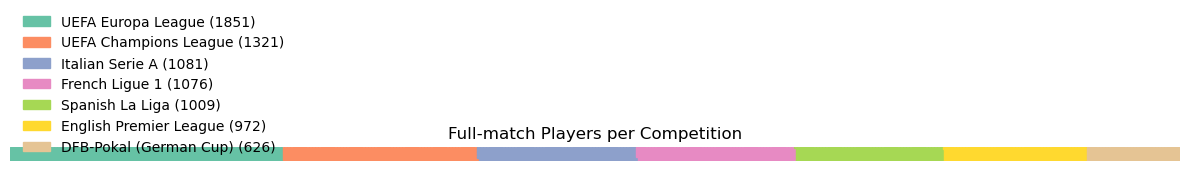

In [38]:
from pywaffle import Waffle

# No of Full Match Players per competition
full_match_players = df[df['minutes_played'] >= 90]

full_match_counts = full_match_players.groupby('competition_name')['player_name'].nunique().sort_values(ascending=False)

data = full_match_counts.to_dict()

# Plot waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    title={'label': 'Full-match Players per Competition', 'loc': 'center'},
    labels=[f"{k} ({v})" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 1, 'framealpha': 0},
    figsize=(12, 12)
)

plt.show()


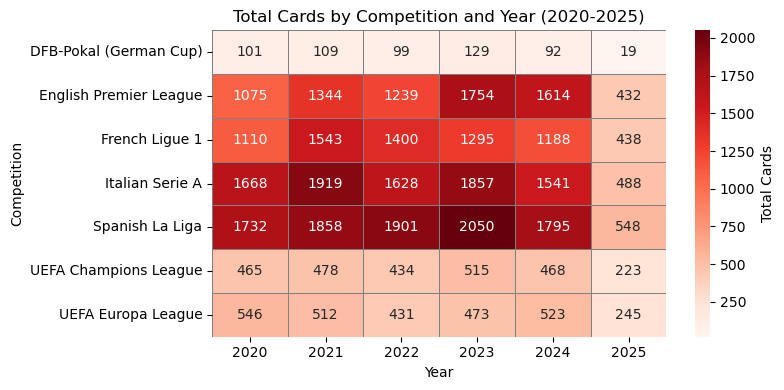

In [39]:
#otal Cards by Competition and Year (2020-2025)

df['total_cards'] = df['yellow_cards'] + df['red_cards']

cards_by_comp_year = (
    df.groupby(['competition_name', 'year'])['total_cards']
    .sum()
    .reset_index()
)

heatmap_data = cards_by_comp_year.pivot(index='competition_name', columns='year', values='total_cards').fillna(0)

# Step 4: Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Reds', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Total Cards'})

plt.title('Total Cards by Competition and Year (2020-2025)')
plt.xlabel('Year')
plt.ylabel('Competition')
plt.tight_layout()
plt.show()


# Trends

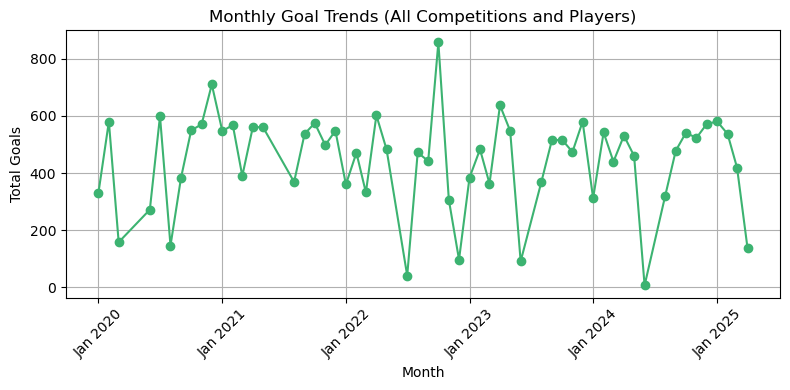

In [41]:
# Monthly Goal Trends (All Competitions and Players

df['year_month'] = df['date'].dt.to_period('M')
monthly_goals = df.groupby('year_month')['goals'].sum().reset_index()
monthly_goals['year_month'] = monthly_goals['year_month'].dt.to_timestamp()

plt.figure(figsize=(8,4))
plt.plot(monthly_goals['year_month'], monthly_goals['goals'], marker='o', color='mediumseagreen')

plt.title('Monthly Goal Trends (All Competitions and Players)')
plt.xlabel('Month')
plt.ylabel('Total Goals')
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


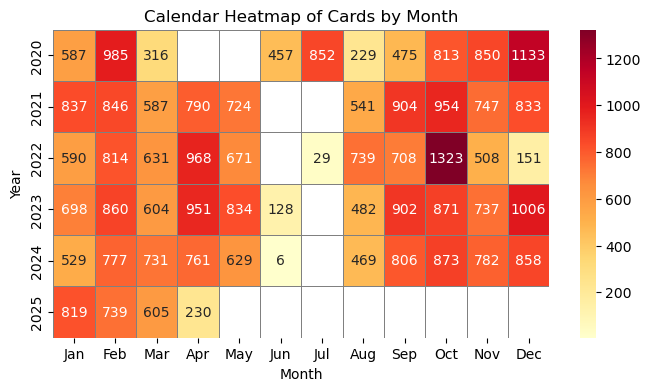

In [42]:
# Heatmap of Cards by Month
df['cards'] = df['yellow_cards'] + df['red_cards']
df['year_month'] = df['date'].dt.to_period('M')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

cards_monthly = df.groupby(['year', 'month'])['cards'].sum().reset_index()

heatmap_data = cards_monthly.pivot(index='year', columns='month', values='cards')

heatmap_data.columns = [calendar.month_abbr[m] for m in heatmap_data.columns]

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5, linecolor='gray')

plt.title('Calendar Heatmap of Cards by Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

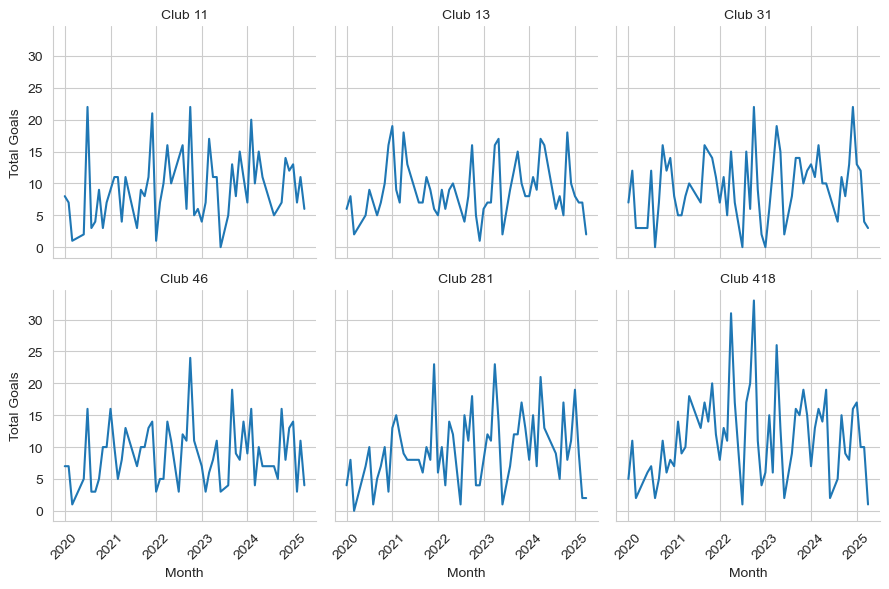

In [43]:
# Ensure 'date' column is datetime
df['date'] = pd.to_datetime(df['date'])

# Prepare monthly data
df['year_month'] = df['date'].dt.to_period('M')
df['year_month'] = df['year_month'].dt.to_timestamp()

# Aggregate goals per club and month
club_goals = df.groupby(['player_current_club_id', 'year_month'])['goals'].sum().reset_index()

# Rename for clarity
club_goals.rename(columns={'player_current_club_id': 'club'}, inplace=True)

# Filter top 6 clubs by total goals
top_clubs = club_goals.groupby('club')['goals'].sum().nlargest(6).index
club_goals_top = club_goals[club_goals['club'].isin(top_clubs)]

# Plot small multiples
sns.set_style('whitegrid')
g = sns.FacetGrid(club_goals_top, col='club', col_wrap=3, height=3, sharey=True)
g.map_dataframe(sns.lineplot, x='year_month', y='goals')
g.set_axis_labels('Month', 'Total Goals')
g.set_titles(col_template='Club {col_name}')
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Predictive Analysis for Future top scorers

/var/folders/v5/4ccz2795095ccxq1htc4bv7c0000gn/T/ipykernel_3266/4241614887.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key='date', freq='M'), 'player_name'])['goals']
12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


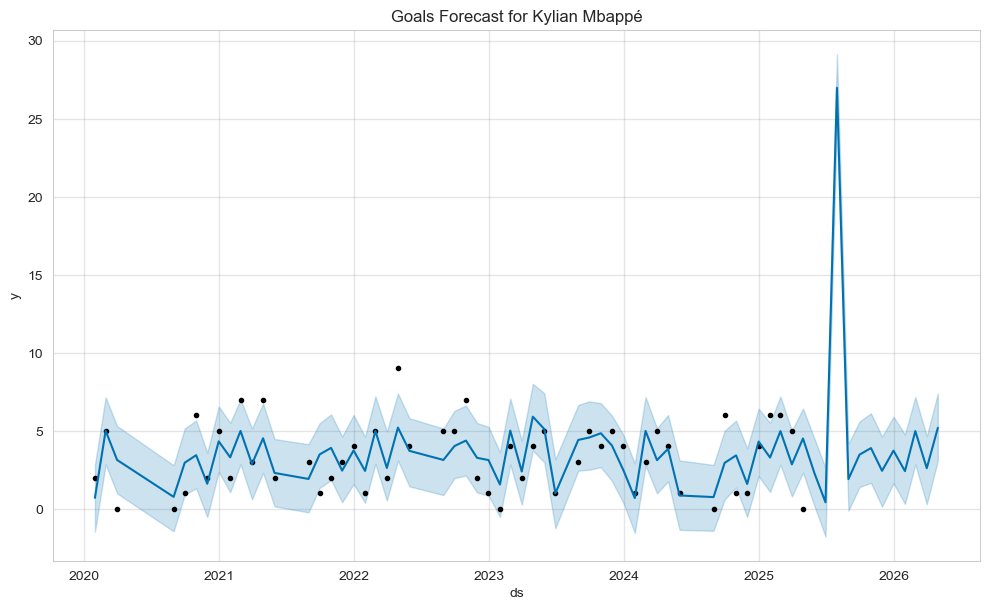

12:47:14 - cmdstanpy - INFO - Chain [1] start processing
12:47:14 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


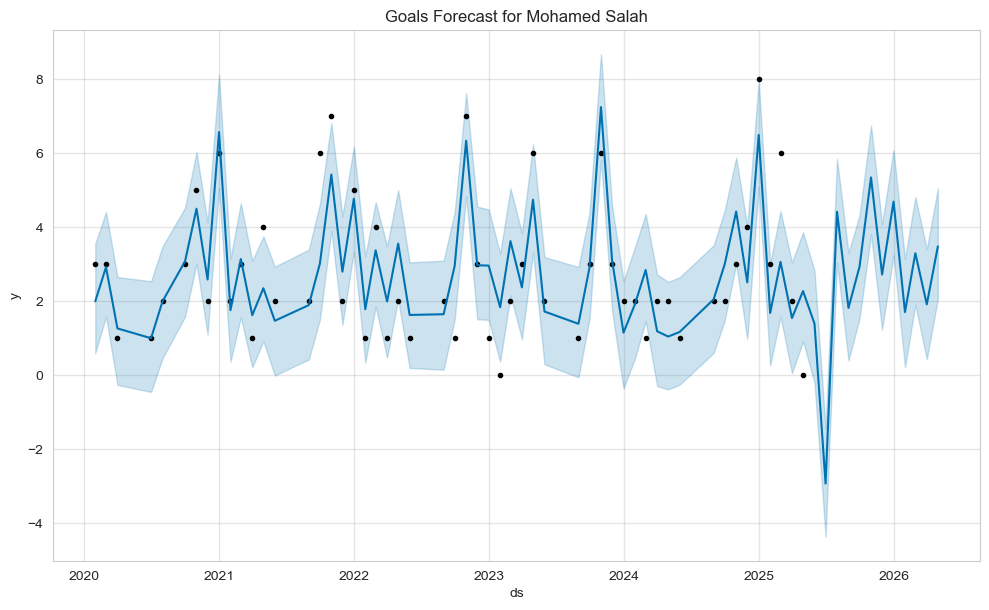

12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


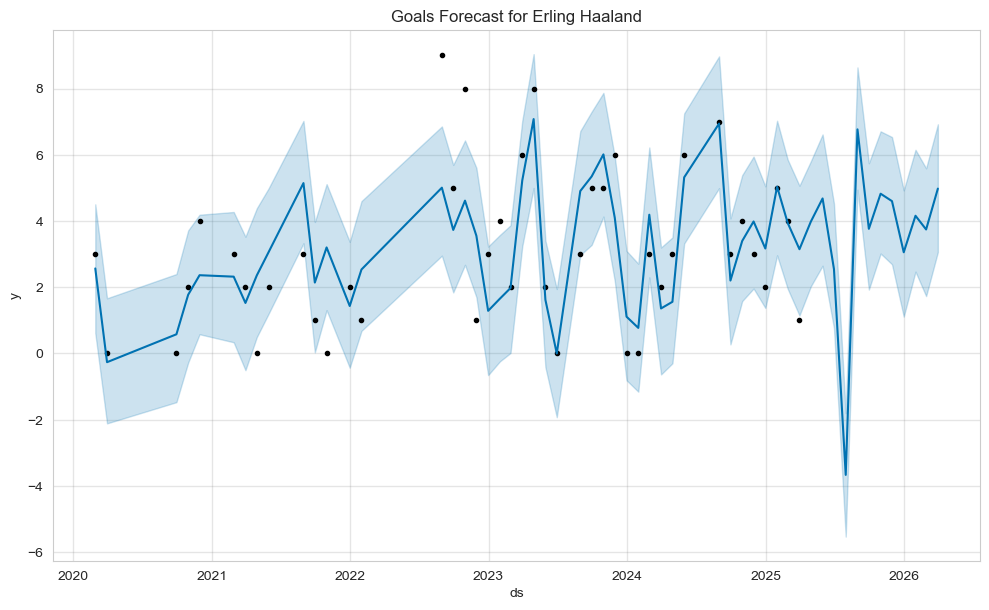

12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:15 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


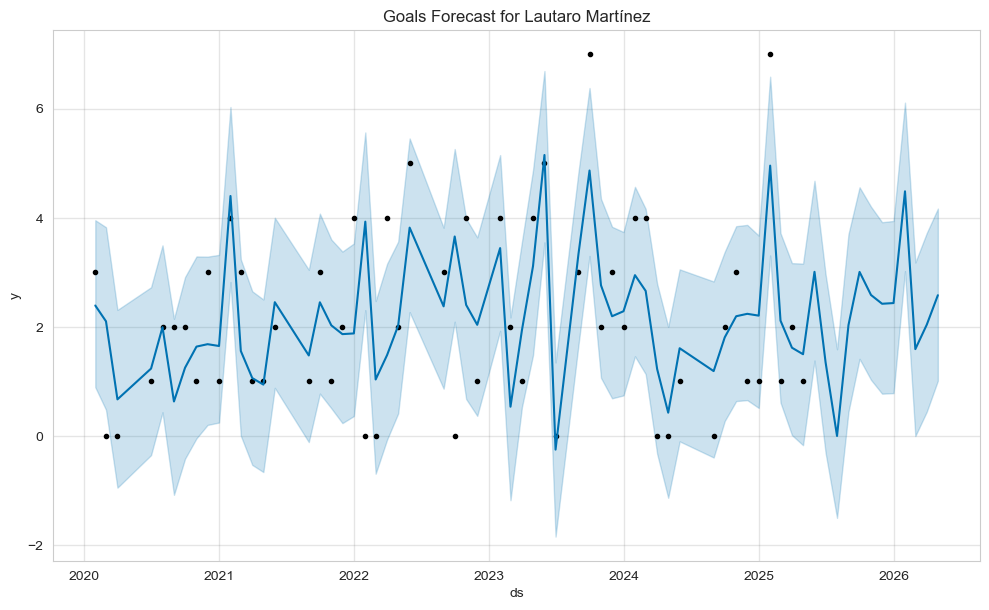

12:47:15 - cmdstanpy - INFO - Chain [1] start processing
12:47:16 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


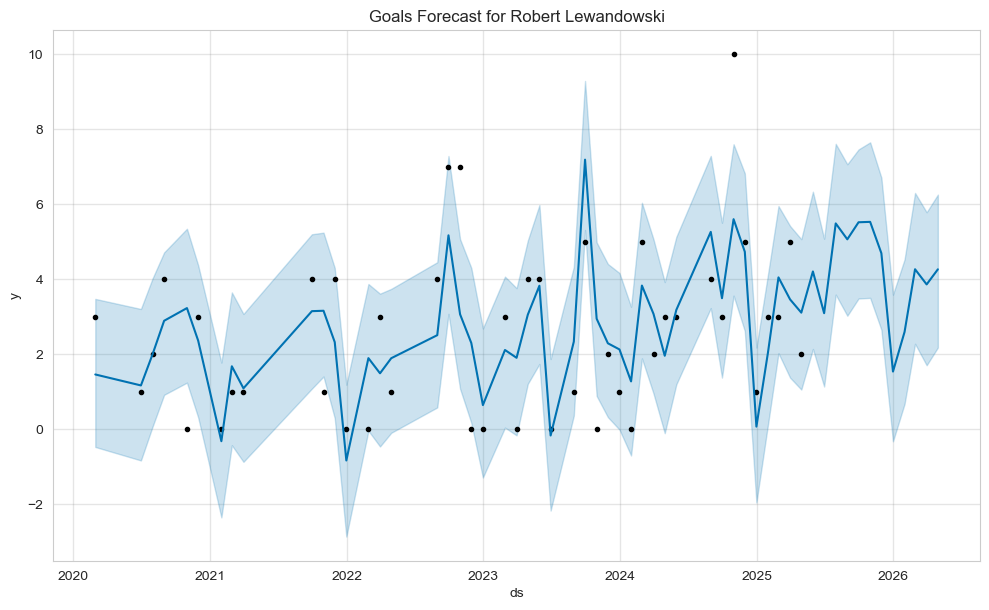

In [45]:
# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Aggregate goals monthly per player
monthly_goals = (
    df.groupby([pd.Grouper(key='date', freq='M'), 'player_name'])['goals']
    .sum()
    .reset_index()
)

monthly_goals.rename(columns={'date': 'ds', 'goals': 'y'}, inplace=True)

top_players = df.groupby('player_name')['goals'].sum().sort_values(ascending=False).head(5).index.tolist()
for player in top_players:
    player_data = monthly_goals[monthly_goals['player_name'] == player][['ds', 'y']]
    
    if len(player_data) < 12:  # skip if not enough data
        continue
    
    model = Prophet(yearly_seasonality=True)
    model.fit(player_data)
    
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)
    
    model.plot(forecast)
    plt.title(f'Goals Forecast for {player}')
    plt.show()
